## Import Libs

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("4K_House_Rent_Dataset.csv")
data.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


## Data Pre Processing

In [ ]:
y = data['Rent'].values
x1,x2,x3 = data['Size'].values,data['Bathroom'].values,data['BHK'].values
x4=data['Furnishing Status'].replace({"Unfurnished": 0, "Semi-Furnished": 1, "Furnished": 2}).values
y,x1,x2,x3,x4

(array([10000, 20000, 17000, ..., 35000, 45000, 15000]),
 array([1100,  800, 1000, ..., 1750, 1500, 1000]),
 array([2, 1, 1, ..., 3, 2, 2]),
 array([2, 2, 2, ..., 3, 3, 2]),
 array([0, 1, 1, ..., 1, 1, 0]))

### Clean Data

In [ ]:
data.isnull().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

In [ ]:
def replace_nan_with_mean(ar):
  return [ar.mean() if item is None else item for item in ar]

In [ ]:
x1 = replace_nan_with_mean(x1)
x2 = replace_nan_with_mean(x2)
x3 = replace_nan_with_mean(x3)
# x4 = replace_nan_with_mean(x4)

# Normal Equation

In [ ]:
Y = np.array(y)
# X = np.column_stack([x1,x2,x3,x4])
X = np.array([[a0,a1,a2,a3,a4] for a0,a1,a2,a3,a4 in zip(np.ones(len(y)),x1,x2,x3,x4)])

In [ ]:
XT = np.transpose(X)
XTX = np.matmul(XT,X)
XTY = np.matmul(XT,Y)
INV_XTX = np.linalg.inv(XTX)
thetas = np.matmul(INV_XTX,XTY)
thetas

array([-4.23693863e+04,  2.35095594e+01,  2.64676202e+04, -1.29289804e+03,
        6.93957077e+03])

In [ ]:
sum = 0
for i in range(len(x1)):
    tsum = thetas[0] +  thetas[1]*x1[i] + thetas[2]*x2[i] + thetas[3]*x3[i] + thetas[4]*x4[i] - y[i]
    tsum = tsum * tsum
    sum = sum + tsum
    
cost = sum/(2*len(x1))
cost

2394004443.12778

# Normal Equation Plots

In [ ]:
def plot(x, y, label_x, label_y, theta, theta0):
  lin_x = np.linspace(np.min(x), np.max(x), 10)
  reg_line = theta * lin_x + theta0
  plt.plot(lin_x, reg_line, c='r', label='Regression Line')
  plt.scatter(x, y, label = 'Scatter Plot')
  plt.xlabel(label_x)
  plt.ylabel(label_y)
  plt.legend()
  plt.show()

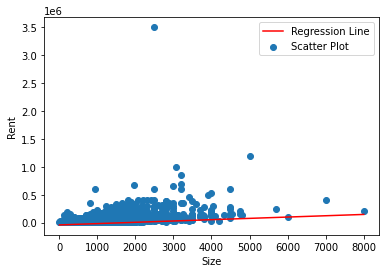

In [ ]:
plot(x1, y, "Size", "Rent", thetas[1], thetas[0])

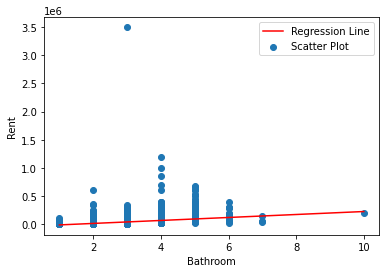

In [ ]:
plot(x2, y, "Bathroom", "Rent", thetas[2], thetas[0])

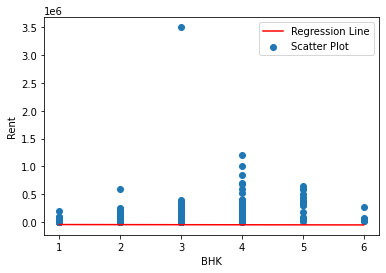

In [ ]:
plot(x3, y, "BHK", "Rent", thetas[3], thetas[0])

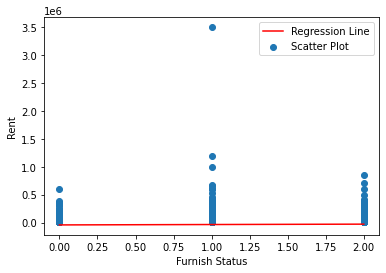

In [ ]:
plot(x4, y, "Furnish Status", "Rent", thetas[4], thetas[0])

# Gradient Descent


In [ ]:
epoch = 1000
learning_rate = 0.0000001
m=len(x1)
t0 = 0
t1 = 0
t2 = 0
t3 = 0
t4 = 0

In [ ]:
for i in range(epoch):
    cx0 = 0
    cx1 = 0
    cx2 = 0
    cx3 = 0
    cx4 = 0
    
    for j in range(m):
        cx0 += (t0 + t1*x1[j] + t2*x2[j] + t3*x3[j] + t4*x4[j] - y[j])
        cx1 += (t0 + t1*x1[j] + t2*x2[j] + t3*x3[j] + t4*x4[j] - y[j]) * x1[j]
        cx2 += (t0 + t1*x1[j] + t2*x2[j] + t3*x3[j] + t4*x4[j] - y[j]) * x2[j]
        cx3 += (t0 + t1*x1[j] + t2*x2[j] + t3*x3[j] + t4*x4[j] - y[j]) * x3[j]
        cx4 += (t0 + t1*x1[j] + t2*x2[j] + t3*x3[j] + t4*x4[j] - y[j]) * x4[j]
        
    t0 = t0 - learning_rate * (cx0) / m
    t1 = t1 - learning_rate * (cx1) / m
    t2 = t2 - learning_rate * (cx2) / m
    t3 = t3 - learning_rate * (cx3) / m
    t4 = t4 - learning_rate * (cx4) / m


t0,t1,t2,t3,t4

(-0.3998476467252764,
 40.60456150073871,
 0.5873033664176552,
 0.0465224868228666,
 0.1753278616268883)

In [ ]:
sum = 0
for j in range(m):
    tsum = t0 +  t1*x1[j] + t2*x2[j] + t3*x3[j] + t4*x4[j] - y[j]
    tsum = tsum * tsum
    sum = sum + tsum
    
cost = sum/(2*m)
cost

2558741756.3962893

# Gradient Descent Plots

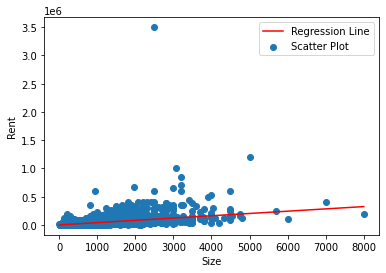

In [ ]:
plot(x1, y, "Size", "Rent", t1, t0)

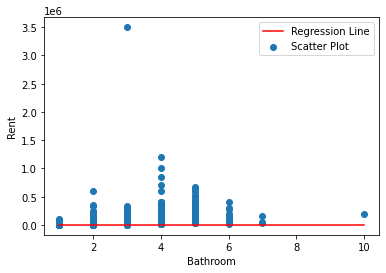

In [ ]:
plot(x2, y, "Bathroom", "Rent", t2, t0)

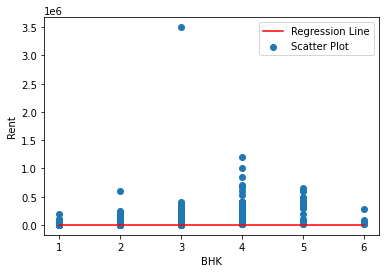

In [ ]:
plot(x3, y, "BHK", "Rent", t3, t0)

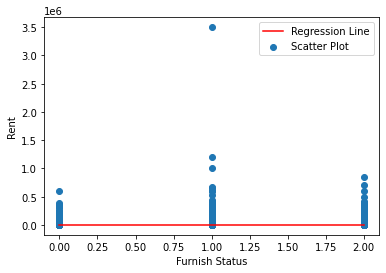

In [ ]:
plot(x4, y, "Furnish Status", "Rent", t4, t0)